<a href="https://colab.research.google.com/github/kartikayladdha/DL/blob/main/DL/Labs/DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2, Create a Flask App for recognition of Handwritten digits


## Downloading basic libraries and data set


In [1]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
from ipywidgets import interact
import tensorflow as tf

In [2]:
from keras.datasets import mnist

In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print("X_train_shape"+str(X_train.shape))
print("Y_train_shape"+str(Y_train.shape))
print("X_test_shape"+str(X_test.shape))
print("Y_test_shape"+str(Y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train_shape(60000, 28, 28)
Y_train_shape(60000,)
X_test_shape(10000, 28, 28)
Y_test_shape(10000,)


## Defining seed

In [4]:
import random as rn

In [5]:
np.random.seed(42)
rn.seed(42)

## Normalizing and reshaping images

In [6]:
X_train=X_train.reshape((60000,28*28))
X_test=X_test.reshape((10000,28*28))

print(X_train.shape)
print(X_test.shape)

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

(60000, 784)
(10000, 784)


## Ploting the images

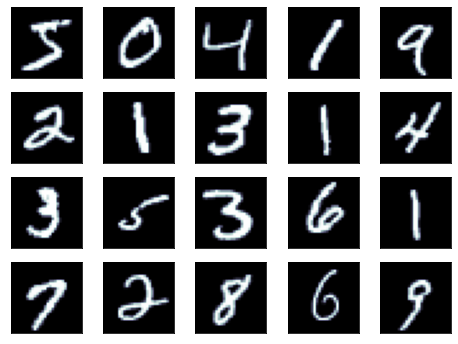

In [7]:
fig = plt.figure(figsize=(8, 6))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28,28), cmap=plt.cm.bone)

## Building ANN

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
Y_train_cat = tf.keras.utils.to_categorical(Y_train)
Y_test_cat = tf.keras.utils.to_categorical(Y_test)

In [10]:
from keras import models
from keras import layers

nn = models.Sequential()
nn.add(layers.Dense(512, activation="tanh",input_shape=(28*28, )))
nn.add(layers.Dense(256, activation="sigmoid"))
nn.add(layers.Dense(64, activation="tanh"))
nn.add(layers.Dense(32, activation="relu"))
nn.add(layers.Dense(10, activation="softmax"))
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 552,106
Trainable params: 552,106
Non-trainable params: 0
_________________________________________________________________


In [11]:
nn.compile(optimizer="rmsprop",
           loss='categorical_crossentropy',
           metrics = ['accuracy'])

## Using callbacks

In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Running the model

In [ ]:
history = nn.fit(X_train,Y_train_cat, epochs=5000, batch_size = 100, validation_split=0.05, verbose=2, callbacks=[es, mc])

Epoch 1/5000
570/570 - 4s - loss: 0.3514 - accuracy: 0.8953 - val_loss: 0.1490 - val_accuracy: 0.9527

Epoch 00001: val_accuracy improved from -inf to 0.95267, saving model to best_model.h5
Epoch 2/5000
570/570 - 1s - loss: 0.1510 - accuracy: 0.9548 - val_loss: 0.0929 - val_accuracy: 0.9717

Epoch 00002: val_accuracy improved from 0.95267 to 0.97167, saving model to best_model.h5
Epoch 3/5000
570/570 - 1s - loss: 0.1034 - accuracy: 0.9679 - val_loss: 0.0817 - val_accuracy: 0.9777

Epoch 00003: val_accuracy improved from 0.97167 to 0.97767, saving model to best_model.h5
Epoch 4/5000
570/570 - 1s - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9787

Epoch 00004: val_accuracy improved from 0.97767 to 0.97867, saving model to best_model.h5
Epoch 5/5000
570/570 - 1s - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.0724 - val_accuracy: 0.9823

Epoch 00005: val_accuracy improved from 0.97867 to 0.98233, saving model to best_model.h5
Epoch 6/5000
570/570 - 1s - loss: 0.04

In [ ]:
test_loss,test_acc=nn.evaluate(X_test,Y_test_cat)
print(test_loss)
print(test_acc)

## Confusion matrix

In [ ]:
predictions = nn.predict_classes(X_test)

In [ ]:
predictions

In [ ]:
predictions = to_categorical(predictions,10)

In [ ]:
a = np.argmax(predictions ,axis=1)

In [ ]:
b = np.argmax(Y_test_cat,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from numpy import argmax

In [ ]:
cm = confusion_matrix(a,b)
cm

In [ ]:
accuracy = sum(cm[i][i] for i in range(10)) / Y_test_cat.shape[0]
print("accuracy = " + str(accuracy))

## Plots

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color= 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Precision and recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(Y_test_cat, predictions, average="macro"))
print('recall score - ', recall_score(Y_test_cat, predictions, average="macro"))    

## Saving and Loading model

In [ ]:
nn.save('best_model.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best_model.h5')

In [ ]:
model.summary()

## Deployement on Flask

In [ ]:
!pip install flask gevent requests pillow

In [ ]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
a = '''
<!doctype html>
<html lang="en">
<head>
<title>My number recognizer</title>
</head> 
  <body>
 
          <h3>Image Recognition Server</h3>
       
      <form action="" method=post enctype=multipart/form-data>
        <input type=file name=file>
        <input type=submit value=Upload>
    </form>
    {{label}}  
     
  </body>
  </html>
  '''

In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

In [ ]:
import os
import cv2
import numpy as np
from flask import Flask, render_template, request
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'


def load_mymodel():
    global mymodel
    mymodel = keras.models.load_model('best_model.h5')

@app.route('/')
def home():
    return render_template('index.html')

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def predictions(file):
    """img = image.load_img(file, target_size=(28,28), color_mode="grayscale")
    img = img_to_array(img)"""
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28))
    img = np.resize(img, (1, 28*28))
    """img = np.expand_dims(img, axis=0)"""
    ans = mymodel.predict_classes(img)
    return ans


@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['file']
    filepath = os.path.join(app.config['UPLOADS'], file.filename)
    file.save(filepath)
    output = predictions(filepath)
    if output.astype('int32') == 0:
      output = '0'
    elif output.astype('int32') == 1:
      output = '1'
    elif output.astype('int32') == 2:
      output = '2'
    elif output.astype('int32') == 3:
      output = '3'
    elif output.astype('int32') == 4:
      output = '4'
    elif output.astype('int32') == 5:
      output = '5'
    elif output.astype('int32') == 6:
      output = '6'
    elif output.astype('int32') == 7:
      output = '7'
    elif output.astype('int32') == 8:
      output = '8'
    else:
      output = '9'

    return render_template('index.html', label=output)



if __name__=='__main__':
    load_mymodel()
    app.run()

## Performance in real world

### Testing Images

mnist_0.jpg    mnist_1.jpg    mnist_2.jpg    mnist_3.jpg    mnist_4.jpg    mnist_5.jpg    mnist_6.jpg     mnist_7.jpg    mnist_8.jpg    mnist_9.jpg

### Detection

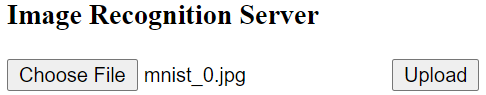

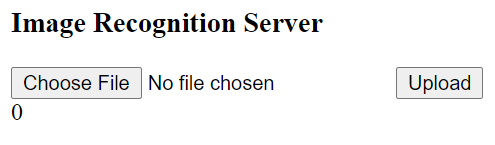

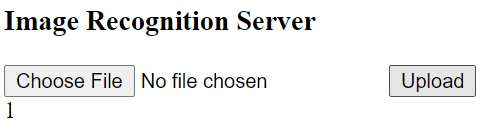

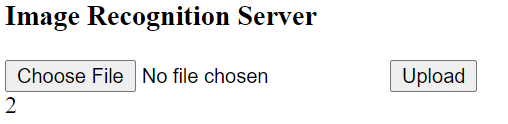

and so on...

The images of digits were classified with proper results, random images were classifed to the nearest digit the model thought of, as we have only 10 outputs here and not a misclassified or not regognized one.